In [87]:
# Import libraries
import pandas as pd

In [88]:
# Load the data
df1 = pd.read_excel('extracted data.xlsx', skiprows=1, header =1 )  # Skips the first row
df2 = pd.read_excel('Meter devices.xlsx' )

In [89]:
df1 = df1[['Non Utility Meter Name','Modbus Address','Single Phase Meter Wiring Phase Identifier (I1/I2/I3)','FATBOX IP Address']]
df2 = df2[['Non Utility Meter Name','FATBOX IP Address']]

In [90]:
df2.head(3)

,Non Utility Meter Name,FATBOX IP Address
0,METER GATEWAY 01,10.173.200.14
1,METER GATEWAY 02,10.173.200.02
2,METER GATEWAY 03,10.173.200.10


In [91]:
import pandas as pd
result = pd.merge(df1, df2, how='left', on='FATBOX IP Address')
sorted_df = result.sort_values(by='FATBOX IP Address')


In [92]:
sorted_df.head(50)

,Non Utility Meter Name_x,Modbus Address,Single Phase Meter Wiring Phase Identifier (I1/I2/I3),FATBOX IP Address,Non Utility Meter Name_y
11,APARTMENT 04,15.0,I1,10.173.200.02,METER GATEWAY 02
17,APARTMENT 10,17.0,NaN,10.173.200.02,METER GATEWAY 02
16,APARTMENT 09,16.0,I3,10.173.200.02,METER GATEWAY 02
15,APARTMENT 08,16.0,I2,10.173.200.02,METER GATEWAY 02
14,APARTMENT 07,16.0,I1,10.173.200.02,METER GATEWAY 02
8,APARTMENT 01,14.0,I1,10.173.200.02,METER GATEWAY 02
9,APARTMENT 02,14.0,I2,10.173.200.02,METER GATEWAY 02
10,APARTMENT 03,14.0,I3,10.173.200.02,METER GATEWAY 02
13,APARTMENT 06,15.0,I3,10.173.200.02,METER GATEWAY 02
12,APARTMENT 05,15.0,I2,10.173.200.02,METER GATEWAY 02


In [93]:
sorted_df.to_excel('visio purpose.xlsx', index=False)

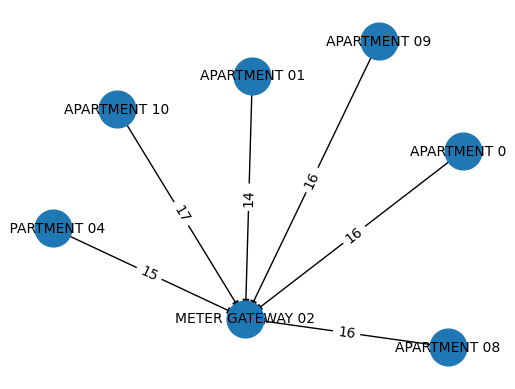

In [94]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Sample data similar to what has been provided
data = {
    'Non Utility Meter Name_x': [
        'APARTMENT 04', 'APARTMENT 10', 'APARTMENT 09',
        'APARTMENT 08', 'APARTMENT 07', 'APARTMENT 01'
    ],
    'Modbus Address': [15, 17, 16, 16, 16, 14],
    'Phase Meter Wiring Phase Identifier': ['I1', 'I3', 'I3', 'I2', 'I1', 'I1'],
    'FATBOX IP Address': [
        '10.173.200.02', '10.173.200.02', '10.173.200.02',
        '10.173.200.02', '10.173.200.02', '10.173.200.02'
    ],
    'Utility Meter Name_y': [
        'METER GATEWAY 02', 'METER GATEWAY 02', 'METER GATEWAY 02',
        'METER GATEWAY 02', 'METER GATEWAY 02', 'METER GATEWAY 02'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in df.iterrows():
    apartment = row['Non Utility Meter Name_x']
    gateway = row['Utility Meter Name_y']
    modbus_address = row['Modbus Address']
    phase_id = row['Phase Meter Wiring Phase Identifier']
    fatbox_ip = row['FATBOX IP Address']

    # Add nodes for apartment and gateway if they do not exist
    G.add_node(apartment, type='apartment', modbus=modbus_address, phase=phase_id)
    G.add_node(gateway, type='gateway', ip=fatbox_ip)

    # Add edge with Modbus address as label
    G.add_edge(apartment, gateway, label=str(modbus_address))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))

# Show plot
plt.axis('off')
plt.show()


In [31]:
# Show unique devices
devices = df['Make & Model'].unique()
print(devices)

['SATEC EM133 - XM - 5A' 'Actrel Smart Meter ' 'SATEC EM133 - XM- HACS'
 'SATEC EM133 - XM - 100A' nan 'FATBOX G3' 23047.25]
